### Group 4

In [ ]:
# Install space

#install.packages("dagitty")
#install.packages("ggdag")

In [3]:
# Libraries

library(dagitty)
library(ggdag)


Warning message:
"package 'dagitty' was built under R version 3.6.3"
Attaching package: 'ggdag'

The following object is masked from 'package:stats':

    filter



## Bad Control (M-bias) MODEL 7

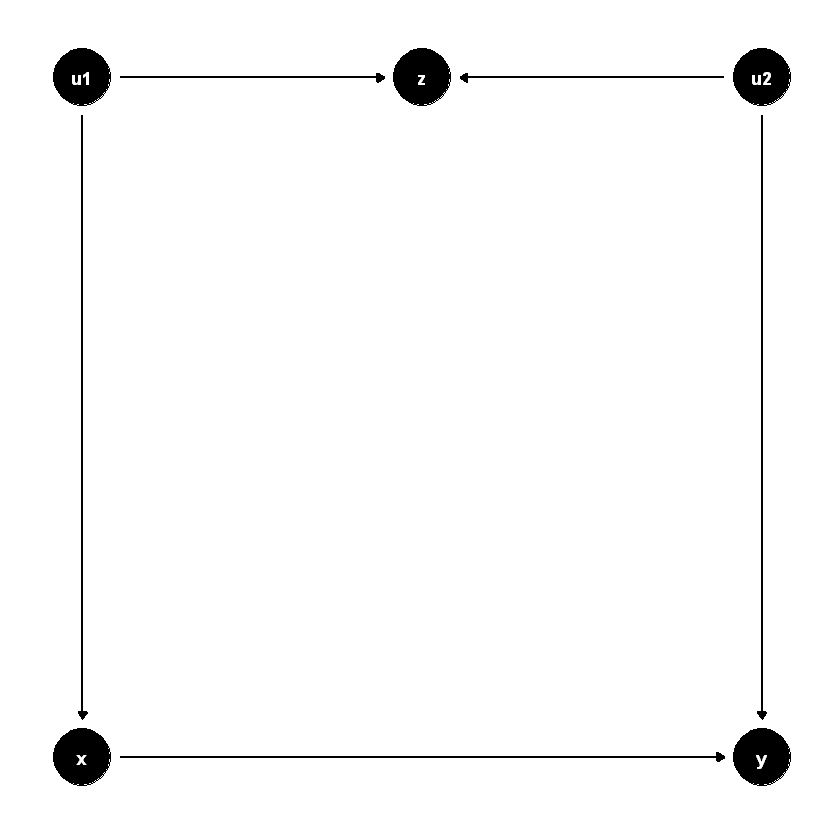

In [17]:
## specify edges
model <- dagitty("dag{x->y; u1->x; u1->z; u2->z; u2->y}")

# set u as latent
latents(model) <- c("u1", "u2")

## coordinates for plotting
coordinates(model) <-  list(
  x = c(x=1, u1=1, z=2, u2=3, y=3),
  y = c(x=1, u1=2, z=2, u2=2, y=1))

## ggplot
ggdag(model) + theme_dag() 

* Its important to say that Z seems be a pre-treatment variable, but its correlated with both X and Y, so it is not a confounder: Z is a bad control. 

### Numerical simulation

In [53]:
# Set Seed
# to make the results replicable (generating random numbers)
set.seed(5)
n = 100
u1 = rnorm(n)
u2 = rnorm(n)
z = 0.5*u1 + 0.5*u2 + rnorm(n)
x = 2*u1 + rnorm(n)
y = 3*x + 2*u2 + rnorm(n)

In [54]:
# Creating a dataframe
A <- matrix(c(u1, u2, z , x, y),  nrow=100, ncol = 5, byrow=FALSE)
data = as.data.frame(A)
colnames(data) <- c('u1','u2','z','x','y')
data

u1,u2,z,x,y
-0.84085548,-1.99538697,-1.53179940,-0.47156487,-5.875594986
1.38435934,1.13531128,0.96473449,2.95737585,11.612072502
-1.25549186,0.67579457,0.69931982,-0.54848505,-1.769206159
0.07014277,0.20848326,-0.63581879,0.27899747,0.338004228
1.71144087,-0.05784564,1.10269588,1.84425439,5.875046946
-0.60290798,0.89381141,0.55623336,-2.00283723,-4.933391334
-0.47216639,-0.22886538,0.26066728,0.28002111,0.003894246
-0.63537131,-1.96565265,-0.36394126,-1.63607619,-6.832672921
-0.28577363,-0.75351045,-0.88718374,-0.73413755,-4.259601895
0.13810822,1.28015162,1.44950668,0.83669563,3.089603970


In [55]:
# Unadjusted estimate is *not* confounded!

lm(y ~ x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
  -0.006916     3.074213  


In [56]:
# Adjusting for Z induces bias!

lm(y ~ x + z)


Call:
lm(formula = y ~ x + z)

Coefficients:
(Intercept)            x            z  
   -0.02079      2.83113      0.90813  


* In the first regression, it can be seen that the coefficient of $x$ is smaller compared to the second regression model; this can be explained because by defining, through the regression equation, that there is a direct relationship between $y$ and $x$, its coefficient will be higher than defining that $y$ also depends on another variable more like $z$; that is, the causal weight of the variable x is lower if another variable is added that is also correlated with $y$ and $x$.